# run synthesize 003.json


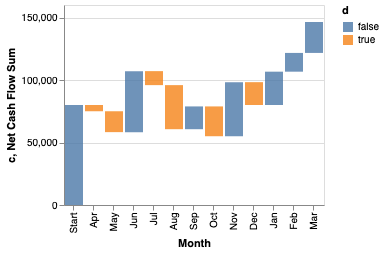

library(jsonlite)
library(ggplot2)
data <- fromJSON('[{"Month": "Start", "Net Cash Flow": 80000, "Net Cash Flow Sum": 80000, "c": 0, "d": false}, {"Month": "Apr", "Net Cash Flow": -5003, "Net Cash Flow Sum": 74997, "c": 80000, "d": true}, {"Month": "May", "Net Cash Flow": -16700, "Net Cash Flow Sum": 58297, "c": 74997, "d": true}, {"Month": "Jun", "Net Cash Flow": 48802, "Net Cash Flow Sum": 107099, "c": 58297, "d": false}, {"Month": "Jul", "Net Cash Flow": -11198, "Net Cash Flow Sum": 95901, "c": 107099, "d": true}, {"Month": "Aug", "Net Cash Flow": -35260, "Net Cash Flow Sum": 60641, "c": 95901, "d": true}, {"Month": "Sep", "Net Cash Flow": 18220, "Net Cash Flow Sum": 78861, "c": 60641, "d": false}, {"Month": "Oct", "Net Cash Flow": -23840, "Net Cash Flow Sum": 55021, "c": 78861, "d": true}, {"Month": "Nov", "Net Cash Flow": 43250, "Net Cash Flow Sum": 98271, "c": 55021, "d": false}, {"Month": "Dec", "Net Cash Flow": -18280, "Net Cash Flow Sum": 79991, "c": 98271, "d": true}, {"Month

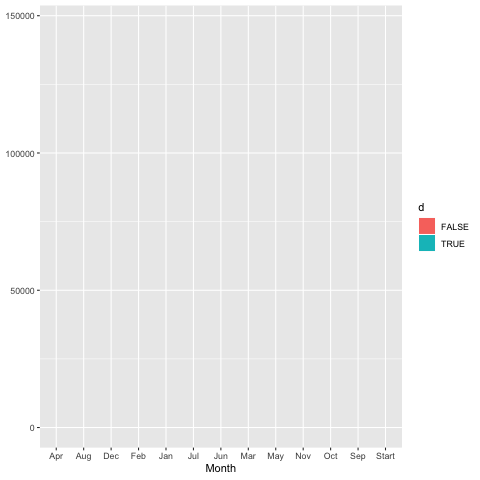

In [2]:
import rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

%reload_ext rpy2.ipython
%reload_ext autoreload

import json
import pandas as pd
import os
from vega import VegaLite
from ipywidgets import widgets

from falx.chart import *
from interface import Falx

DATA_DIR = os.path.join("..", "benchmarks")

def render_ggplot2(vis):
    """Given a visualization (VisDesign object), 
        render it using ggplot"""
    
    ggplot_script = vis.to_ggplot2()
    print("\n".join(ggplot_script))
    for l in ggplot_script:
        %R -i l
        %R eval(parse(text=l))
    %R print(p)

def render_vegalite(vis):
    # Render a visualization using vegalite
    VegaLite(vis.to_vl_obj()).display()
    
def run_synthesis(fname):

    with open(os.path.join(DATA_DIR, fname), "r") as f:
        data = json.load(f)

    print("# run synthesize {}".format(fname))

    input_data = table_utils.load_and_clean_table(data["input_data"])
    vis = VisDesign.load_from_vegalite(data["vl_spec"], data["output_data"])
    
    trace = vis.eval()
    candidates = Falx.synthesize(inputs=[input_data], vtrace=trace)
    
    for pt, pv in candidates:
        render_vegalite(pv)
        #render_ggplot2(pv)
        
def view_benchmarks(dirname):

    for fname in os.listdir(dirname):
        if not fname.endswith(".json"): continue
            
        if "003" not in fname: continue
    
        with open(os.path.join(dirname, fname), "r") as f:
            data = json.load(f)

        print("# run synthesize {}".format(fname))

        input_data = table_utils.load_and_clean_table(data["input_data"])
        vis = VisDesign.load_from_vegalite(data["vl_spec"], data["output_data"])
        try:
            render_vegalite(vis)
            render_ggplot2(vis)
        except:
            pass
#run_synthesis('001.json')
view_benchmarks(DATA_DIR)